In [2]:
#  Data manipulation & visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#  NLP libraries: spaCy
import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

sns.set()

In [3]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 86.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df =pd.read_csv("/content/drive/My Drive/deep_balanced_dataset.csv")
df

,review_text,Rating,review_length
0,this is a great alternative to regular brown a...,4,36.0
1,been a long time since i had a fresh tootsie r...,5,14.0
2,if these bars are made in china do we really k...,1,64.0
3,these are a better brand than some other energ...,4,117.0
4,the hemp protein is not only a great buy but i...,5,45.0
...,...,...,...
99995,these are really poor skinny bully sticks i wr...,1,52.0
99996,the flavors are nice and that is the only reas...,3,40.0
99997,comes in a boxwas not sure what happened to th...,4,41.0
99998,this product has no flavor besides the flavor ...,1,43.0


In [6]:
#shape of the dataset
df.shape

(100000, 3)

In [7]:
df.isnull().sum()

,0
review_text,0
Rating,0
review_length,0


In [8]:
#checking for the duplicate values
df.duplicated().sum()

np.int64(0)

In [9]:
#display 3 full sample reviews per rating
for rating in sorted(df['Rating'].unique()):
    print(f"\n⭐ Rating {rating}")
    reviews = df[df['Rating'] == rating].tail(3)
    for _, row in reviews.iterrows():
        print(f"\n- {row['review_text']}\n")


⭐ Rating 1

- these are really poor skinny bully sticks i wrote a different review but it is not appearing i was able to cut these w household scissors and the dog finished it in 5 min i was very happy w previous orders of 6 sticks and opted for these as they were 12


- this product has no flavor besides the flavor of coffee to it no chocolate glazed donut no mocha nut fudge just regular coffee i was tricked by the advertising of this product and hope to save anyone else from this level of disappointment


- this was received in pieces and my daughter said the gingerbread tasted like dog biscuits on the positive side amazon fully refunded my money


⭐ Rating 2

- will not work for 5 c i typed in 5c cases and this one came up i ordered it and received it but its not a 5c case


- i was really hoping this grain free canned cat food will work for my 3 cats looks like it has good ingredients but none of my 3 cats will eat it in fact one of them will smell it and start doing the scratchin

In [10]:
df['word_count'] = df['review_text'].apply(lambda x: len(str(x).split()))

In [11]:
#display the statistics of the word count
min_word_counts = df.groupby('Rating')['word_count'].describe()
print(min_word_counts)

          count      mean        std  min   25%   50%    75%    max
Rating                                                             
1       20000.0  77.59260  61.717615  6.0  36.0  60.0   97.0  499.0
2       20000.0  78.54145  72.645709  4.0  30.0  56.0  101.0  500.0
3       20000.0  88.69250  79.340089  4.0  34.0  61.0  114.0  500.0
4       20000.0  86.92260  71.600874  5.0  37.0  64.0  112.0  499.0
5       20000.0  70.49775  60.127029  7.0  31.0  51.0   88.0  500.0


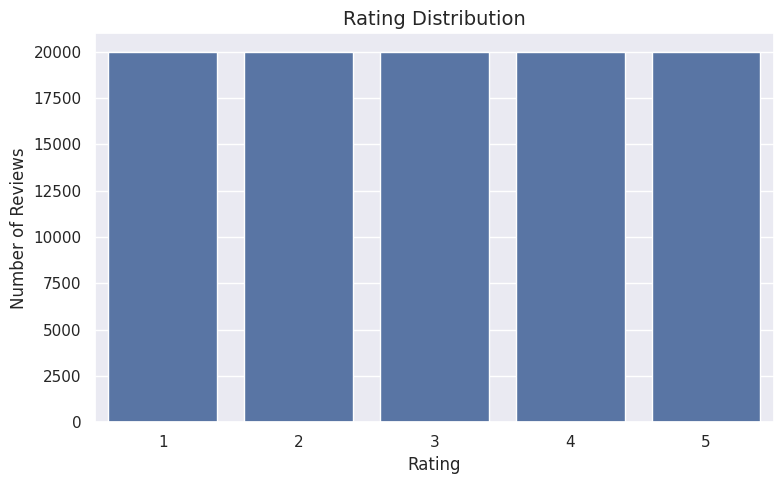

In [12]:
#  Visualize the distribution of review ratings

plt.figure(figsize=(8, 5))  # Set figure size

# Create a count plot for the 'Rating' column
sns.countplot(x='Rating', data=df)

# Add plot titles and labels
plt.title("Rating Distribution", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

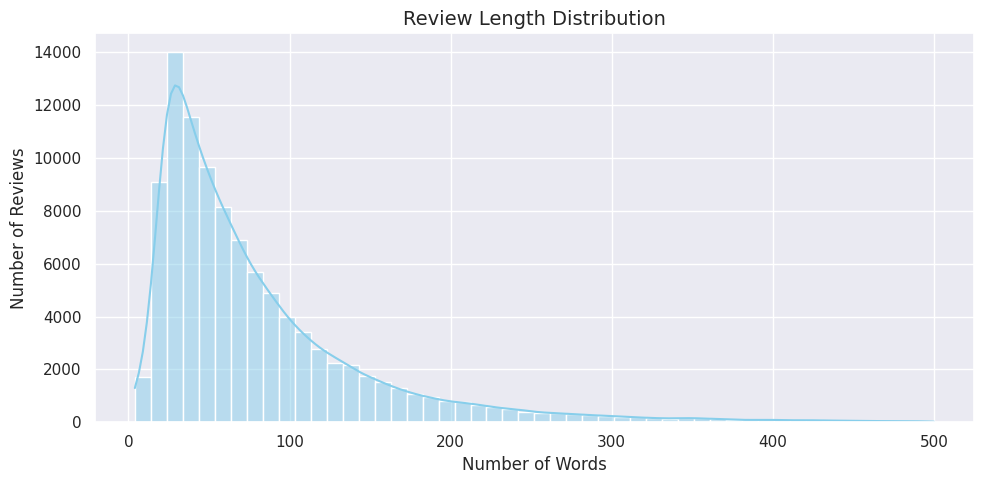

In [13]:
# Visualize the distribution of review lengths (number of words per review)

plt.figure(figsize=(10, 5))  # Set the size of the plot

# Create a histogram of review lengths with a KDE (smoothed line)
sns.histplot(data=df, x='review_length', bins=50, kde=True, color='skyblue')

# Add titles and axis labels
plt.title("Review Length Distribution", fontsize=14)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

# Improve layout and display the plot
plt.tight_layout()
plt.show()

In [14]:
# Count the number of reviews per rating (sorted by rating value)
rating_counts = df['Rating'].value_counts().sort_index()

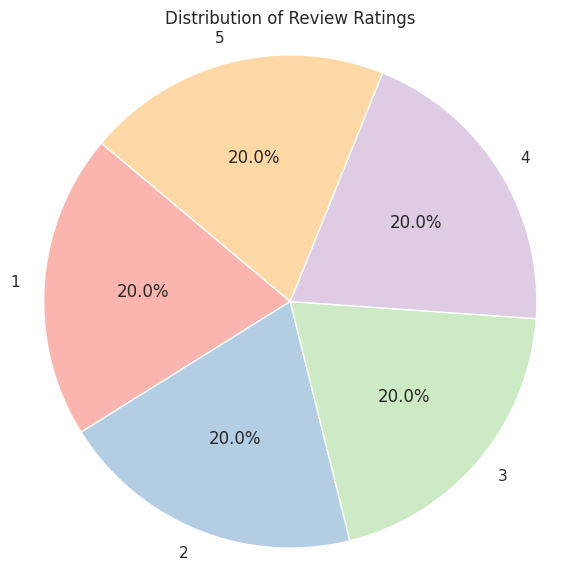

In [15]:
# Labels for pie slices (e.g., '1', '2', ..., '5')
labels = rating_counts.index.astype(str)
#Corresponding values (number of reviews per rating)
sizes = rating_counts.values

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Review Ratings')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.show()

In [16]:
#  Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['review_text'],df['Rating'], test_size=0.2, random_state=42,shuffle=True,stratify=df['Rating'] )

In [17]:
print("Train Rating Distribution:\n", y_train.value_counts(normalize=True))
print("\nTest Rating Distribution:\n", y_test.value_counts(normalize=True))

Train Rating Distribution:
 Rating
5    0.2
4    0.2
1    0.2
2    0.2
3    0.2
Name: proportion, dtype: float64

Test Rating Distribution:
 Rating
4    0.2
1    0.2
3    0.2
2    0.2
5    0.2
Name: proportion, dtype: float64


In [18]:
train_df = pd.DataFrame({'review_text': X_train, 'Rating': y_train})
print(train_df.head())

                                             review_text  Rating
95420  i bought this product for my partner who is a ...       5
41252  my family and friends love the taste of this p...       4
44416  i love french vanilla coffee but the one by ta...       1
76483  i figured i would give larabar a try since i w...       2
15350                    very poor quality material used       2


In [19]:
def spacy_preprocess_pipe(texts):
    processed = []
    for doc in nlp.pipe(texts, batch_size=1000, disable=["ner", "parser"]):  # disable unneeded parts
        tokens = [
            token.lemma_
            for token in doc
            if not token.is_stop and not token.is_space and token.is_alpha
        ]
        processed.append(" ".join(tokens))
    return processed


In [20]:
#print the list of stopwords
print(sorted(nlp.Defaults.stop_words))
# Print total number of unique stopwords in spaCy's English model
print("Number of spaCy stopwords:", len(nlp.Defaults.stop_words))

["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'have', 'he', 'hence', 'her', 'here', 'he

In [21]:
X_train = pd.Series(spacy_preprocess_pipe(X_train))
X_test = pd.Series(spacy_preprocess_pipe(X_test))


In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Define tokenizer parameters
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

# Fit tokenizer on training data
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 100

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


In [24]:
#import pickle




#with open('/content/drive/My Drive/maxlen_balanced1.pkl', 'wb') as f:
#    pickle.dump(max_len, f)


In [25]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip


In [26]:
import numpy as np

embedding_index = {}
embedding_dim = 300  # FastText uses 300-dim vectors

# Change path accordingly if it's in Drive
with open("/content/drive/MyDrive/wiki.simple.vec", encoding='utf-8') as f:
    next(f)  # skip header line (e.g., "111051 300")
    for line in f:
        values = line.rstrip().split(' ')
        word = values[0]
        try:
            vector = np.asarray(values[1:], dtype='float32')
            if vector.shape[0] == embedding_dim:  # ensure it's valid
                embedding_index[word] = vector
        except ValueError:
            continue  # skip malformed lines

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Assuming you have already fitted your tokenizer
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1  # +1 for padding token

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector



In [28]:
#  Fix the labels (make them start from 0)
y_train = y_train - 1
y_test = y_test - 1

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()

model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=True))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))  # optional but helps reduce overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 classes for ratings

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(X_train_pad, y_train, epochs=20, batch_size=64, validation_data=(X_test_pad, y_test),callbacks=[early_stop])


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │    29,509,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,509,800 (112.57 MB)

 Trainable params: 29,509,800 (112.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 33ms/step - accuracy: 0.4326 - loss: 1.2804 - val_accuracy: 0.5343 - val_loss: 1.0782
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.5602 - loss: 1.0246 - val_accuracy: 0.5451 - val_loss: 1.0714
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.5941 - loss: 0.9499 - val_accuracy: 0.5467 - val_loss: 1.0857
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.6317 - loss: 0.8698 - val_accuracy: 0.5393 - val_loss: 1.0938


In [ ]:
#model.save("/content/drive/MyDrive/deep_balanced_model.h5")

In [35]:
model.save("/content/drive/MyDrive/deep_balanced_model4.h5")